<a href="https://colab.research.google.com/github/Noir1607/Data-Science/blob/main/Taller2-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primer modelo de ML

In [59]:
from google.colab import files
uploaded = files.upload()

Saving MarathonData.csv to MarathonData.csv


Datos cargados para el analisis

In [60]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['MarathonData.csv']))

In [61]:
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [63]:
df['Wall21'] = pd.to_numeric(df['Wall21'], errors='coerce')

In [64]:
df.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'km4week'}>],
       [<Axes: title={'center': 'sp4week'}>,
        <Axes: title={'center': 'Wall21'}>],
       [<Axes: title={'center': 'MarathonTime'}>, <Axes: >]], dtype=object)

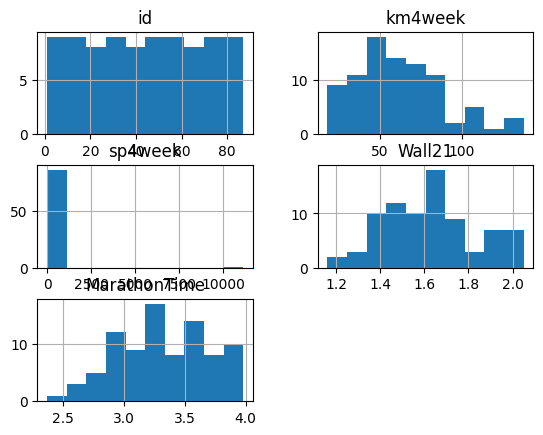

In [65]:
df.hist()

Vamos a eliminar las columnas que no necesitamos para reducir la dimencionalidad de los datos

In [66]:
df = df.drop(columns = ['Name'])
df = df.drop(columns = ['id'])
df = df.drop(columns = ['Marathon'])
df = df.drop(columns = ['CATEGORY'])
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


In [67]:
df.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [68]:
df['CrossTraining'] = df['CrossTraining'].fillna(0)
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [69]:
df = df.dropna(how='any')
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [70]:
df['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [71]:
cod = {"CrossTraining": {'ciclista 1h': 1 ,'ciclista 3h': 2 ,'ciclista 4h': 3 ,  'ciclista 5h': 4 ,  'ciclista 13h': 5 }}
df.replace(cod , inplace=True)
df

<ipython-input-71-751bc96e1fef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(cod , inplace=True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,2,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [72]:
df['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [73]:
cod = {"Category": {'MAM': 1 ,'M45': 2 ,'M40': 3 , 'M50': 4 , 'M55': 5 ,'WAM':6}}
df.replace(cod , inplace=True)
df

<ipython-input-73-19b237558506>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(cod , inplace=True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


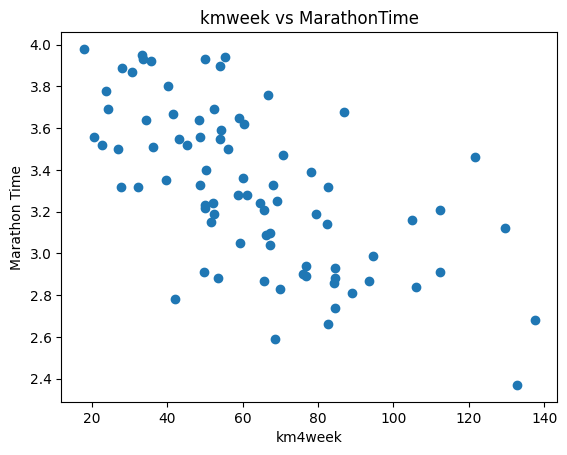

In [74]:
import matplotlib.pyplot as plt

plt.scatter (x = df['km4week'], y= df['MarathonTime'])

plt.title('kmweek vs MarathonTime')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

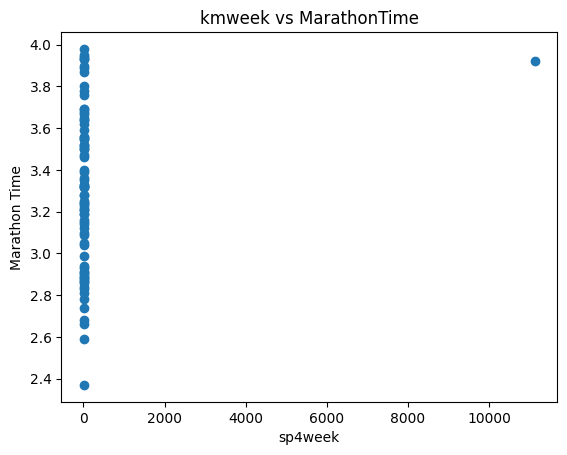

In [75]:
plt.scatter (x = df['sp4week'], y= df['MarathonTime'])

plt.title('sp4week vs MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

In [77]:
df = df.query('sp4week < 1000')

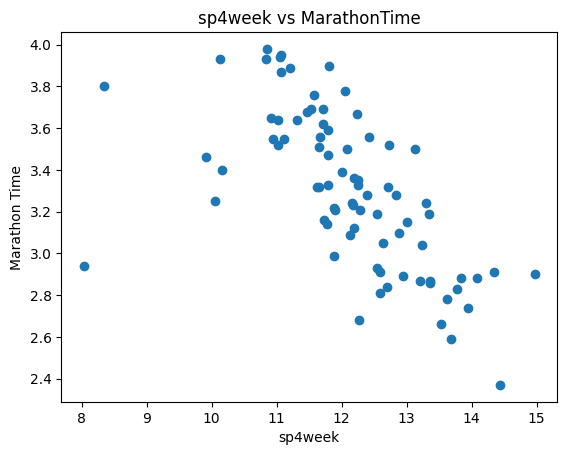

In [78]:
plt.scatter (x = df['sp4week'], y= df['MarathonTime'])

plt.title('sp4week vs MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

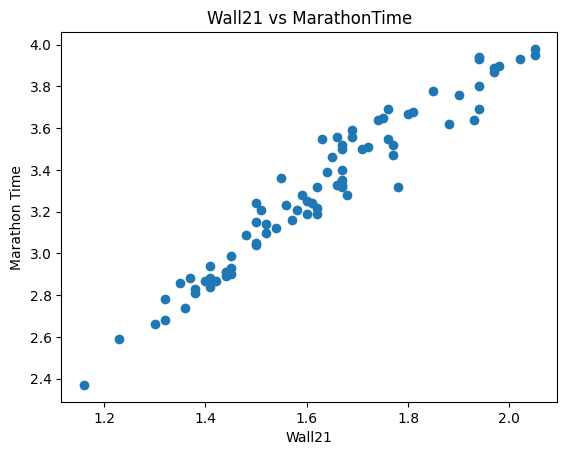

In [79]:
plt.scatter (x = df['Wall21'], y= df['MarathonTime'])

plt.title('Wall21 vs MarathonTime')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')
plt.show()

FASE 2 : ENTRENAMIENTO DEL MODELO

In [80]:
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


In [84]:
datose_entrenamiento = df.sample(frac=0.8 , random_state= 0)
datos_test = df.drop(datose_entrenamiento.index)

In [85]:
datose_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,2,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,2,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


In [86]:
etiquetas_entrenamiento = datose_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

In [87]:
etiquetas_entrenamiento

54    3.47
28    3.15
31    3.19
84    3.94
47    3.35
      ... 
55    3.50
20    2.99
79    3.90
8     2.83
13    2.88
Name: MarathonTime, Length: 64, dtype: float64

In [88]:
datose_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21
54,3,70.7,11.783333,0,1.77
28,2,51.6,13.008403,0,1.50
31,1,79.4,13.344538,0,1.60
84,3,55.4,11.043189,0,1.94
47,2,39.6,12.247423,0,1.67
...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67
20,1,94.5,11.886792,0,1.45
79,1,53.9,11.802920,0,1.98
8,1,70.0,13.770492,1,1.38


In [89]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datose_entrenamiento, etiquetas_entrenamiento)

LinearRegression()

In [90]:
predicciones = modelo.predict(datos_test)
predicciones

array([2.79390706, 2.81599412, 3.05747527, 3.0497715 , 3.0601308 ,
       3.29473308, 3.36211907, 3.36226188, 3.17473152, 3.29138286,
       3.37757783, 3.5216523 , 3.5919168 , 3.55016407, 3.66416024,
       3.85281097])

In [99]:
import numpy as np
from sklearn.metrics import mean_absolute_error
error = np.sqrt(mean_absolute_error(etiquetas_test, predicciones))
print("Error porcentual : %f " % (error*100))

Error porcentual : 31.248892 


In [101]:
nuevo_corredor = pd.DataFrame(np.array([[1,400,15,0,1.4]]), columns=['Category','km4week','sp4week','CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,15.0,0.0,1.4


In [102]:
modelo.predict(nuevo_corredor)

array([2.33246381])